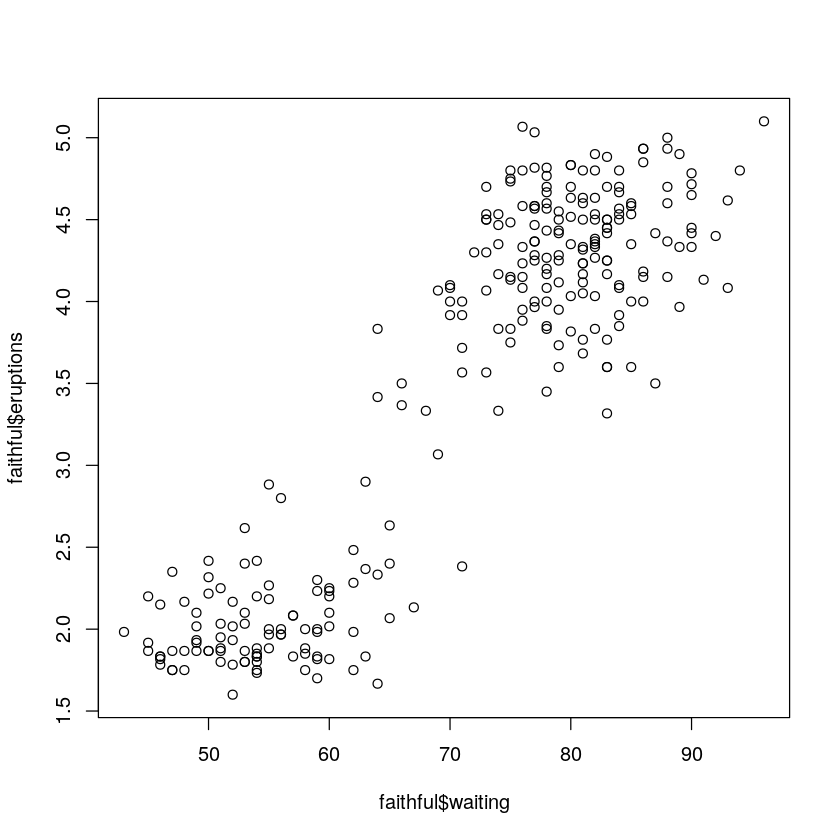

In [6]:
# Recursos
# https://datasciencelab.wordpress.com/2013/12/27/finding-the-k-in-k-means-clustering/
# http://people.sc.fsu.edu/~jburkardt/datasets/hartigan/hartigan.html
# http://datascience.stackexchange.com/questions/5656/k-means-what-are-some-good-ways-to-choose-an-efficient-set-of-initial-centroids
# https://rpubs.com/FelipeRego/K-Means-Clustering
# http://www.r-statistics.com/2013/08/k-means-clustering-from-r-in-action/

# Dataset: https://www.dropbox.com/s/g5xmswspptjfm7t/nutrient.csv?dl=0

# install.packages("cluster") #Install packages
# Next packages for confusion matrix (optional)
# install.packages("e1071")
# install.packages("caret")
# install.packages("lattice")
# install.packages("ggplot2")

# Usaremos el conjunto de datos faithful que 
# usamos en nuestra regresión lineal

plot(faithful$waiting, faithful$eruptions)

# ¿Cuántos clusteres se observan?
# Ver: https://stackoverflow.com/questions/15376075/cluster-analysis-in-r-determine-the-optimal-number-of-clusters

K-means clustering with 3 clusters of sizes 92, 94, 86

Cluster means:
  eruptions  waiting
1  4.377315 84.48913
2  2.056734 54.05319
3  4.100360 74.76744

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  3   2   3   2   1   2   1   1   2   1   2   1   3   2   1   2   2   1   2   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   2   3   3   3   1   2   3   3   3   3   3   3   1   3   2   2   1   2   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   2   1   2   3   1   2   2   1   2   3   1   2   1   2   1   3   2   3   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   1   2   1   2   1   3   3   3   3   1   2   3   3   2   3   2   3   3   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  3   1   3   3   3   1   3   1   2   1   2   1   2   3   2   3   1   3   2   1 
101 102 103 104

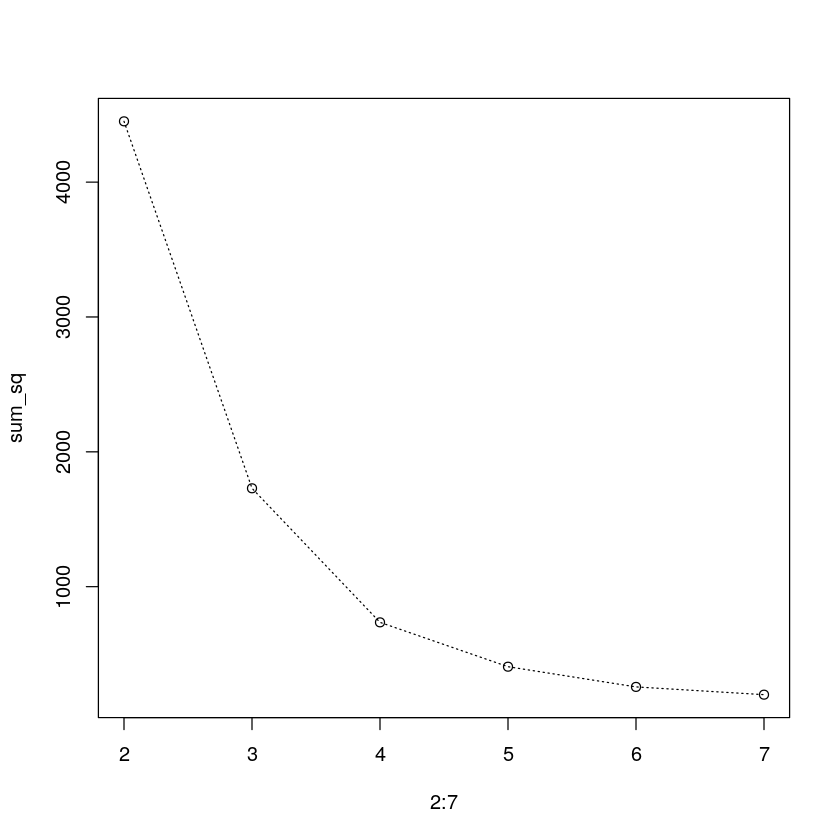

In [7]:
library(cluster) # Import libraries

# Utilizaremos el algoritmo kmeans
# con centros de 2 a 4
# Para nuestro conjunto de datos faithful

cl2 <- kmeans(faithful, centers=2)
cl3 <- kmeans(faithful, centers=3)
cl4 <- kmeans(faithful, centers=4)
cl5 <- kmeans(faithful, centers=5)
cl6 <- kmeans(faithful, centers=6)
cl7 <- kmeans(faithful, centers=7)

# Veamos el resultado para cl3
print(cl3)

# withinss: Vector of within-cluster sum of squares, one component per cluster
# Calcularemos el promedio para la suma de cuadrados de las distancias
# de cada componente del cluster al centroide (1 valor para cada cluster)
# Este promedio para cada caso centers=2 a centers=7
# La idea es que si seguimos agregando clusters, llegará un momento
# en que la distancia entre elementos no cambie tanto,
# Cuando se note este cambio de comporamiento en las distancias
# encontraremos el número óptimo de clusteres (esto es un rule of thumb)

sum_sq <- c(mean(cl2$withinss), mean(cl3$withinss), 
           mean(cl4$withinss), mean(cl5$withinss), mean(cl6$withinss), mean(cl7$withinss))

plot(2:7,sum_sq)
lines(2:7,sum_sq, lty=3)

In [8]:
# Podemos acceder al vector de clusterización clustering vector
# Este es el cluster asignado a cada instancia (registro)
prediction <- cl2$cluster

# Vamos a agregarlo a nuestros datos y visualizar
# los clústeres
data_faithful <- cbind(faithful, prediction)
head(data_faithful)

eruptions,waiting,prediction
3.600,79,2
1.800,54,1
3.333,74,2
2.283,62,1
4.533,85,2
2.883,55,1


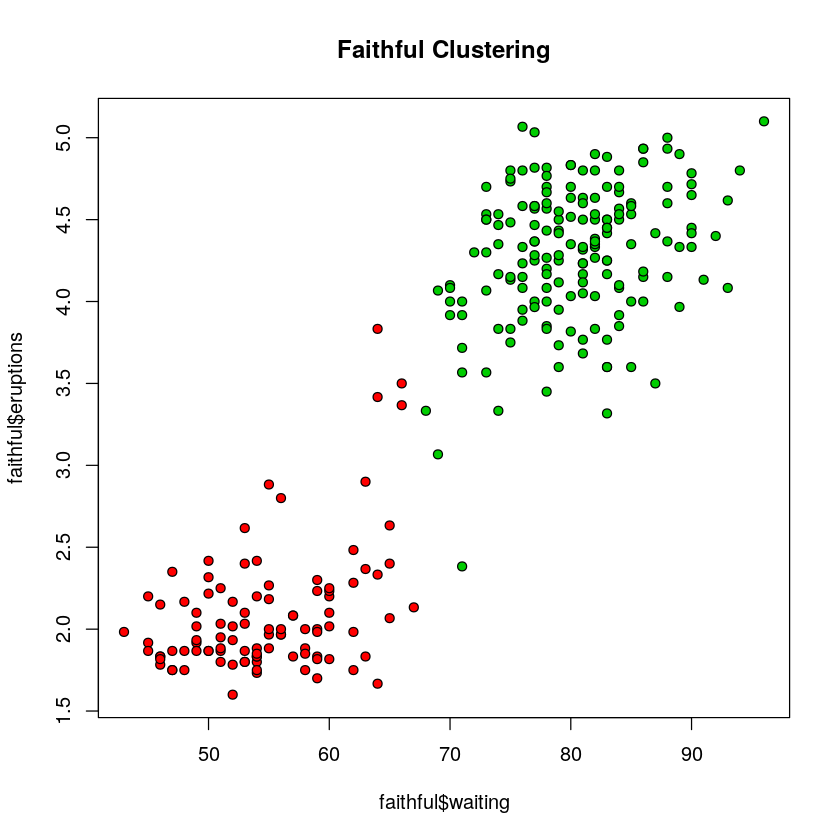

In [9]:
# Visualización para 2 clústeres
plot(faithful$waiting, faithful$eruptions, main = "Faithful Clustering", 
     pch = 21, bg = c("red", "green3")[unclass(data_faithful$prediction)])

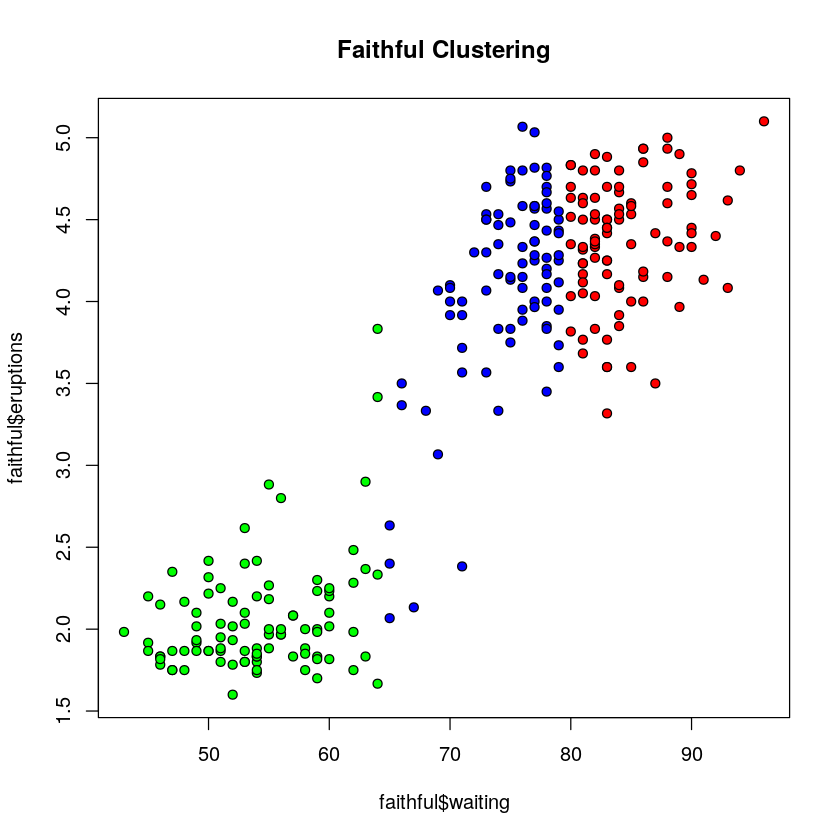

In [10]:
# Visualización para 3 clústeres
prediction <- cl3$cluster
data_faithful <- cbind(faithful, prediction)
plot(faithful$waiting, faithful$eruptions, main = "Faithful Clustering", 
     pch = 21, bg = rainbow(3)[unclass(data_faithful$prediction)])

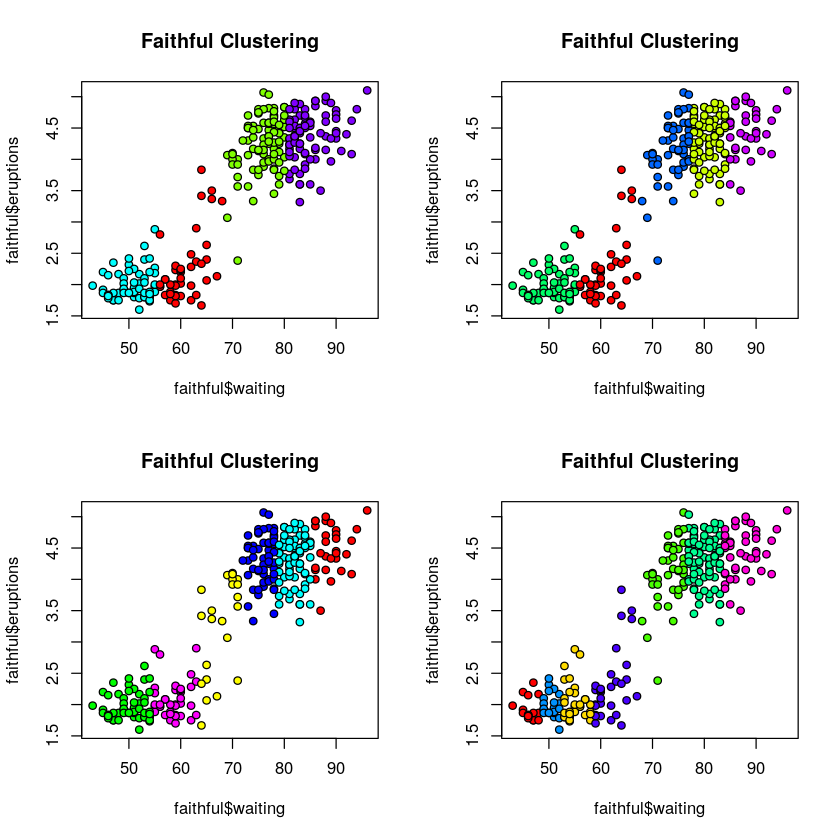

In [11]:
# Visualización para 4,5,6,7 clústeres
par(mfrow=c(2,2))

prediction = cl4$cluster
data_faithful <- cbind(faithful, prediction)
plot(faithful$waiting, faithful$eruptions, main = "Faithful Clustering", 
     pch = 21, bg = rainbow(4)[unclass(data_faithful$prediction)])

prediction = cl5$cluster
data_faithful <- cbind(faithful, prediction)
plot(faithful$waiting, faithful$eruptions, main = "Faithful Clustering", 
     pch = 21, bg = rainbow(5)[unclass(data_faithful$prediction)])

prediction = cl6$cluster
data_faithful <- cbind(faithful, prediction)
plot(faithful$waiting, faithful$eruptions, main = "Faithful Clustering", 
     pch = 21, bg = rainbow(6)[unclass(data_faithful$prediction)])

prediction = cl7$cluster
data_faithful <- cbind(faithful, prediction)
plot(faithful$waiting, faithful$eruptions, main = "Faithful Clustering", 
     pch = 21, bg = rainbow(7)[unclass(data_faithful$prediction)])

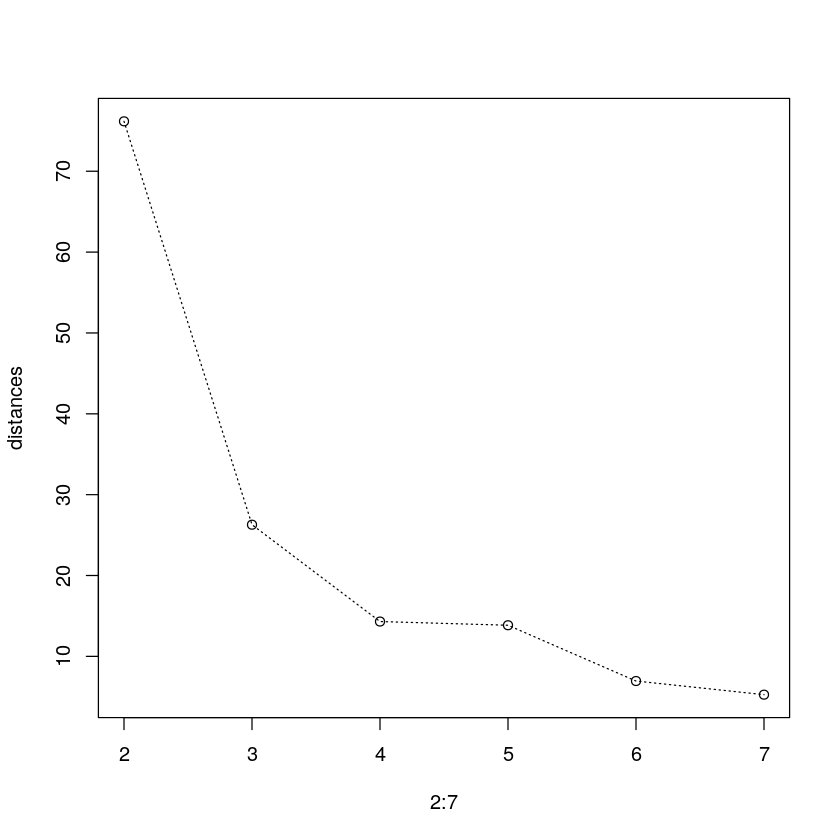

In [12]:
# Vamos a aplicar clustering sobre el conjunto de datos Iris
# Y automatizar el proceso

iris_data <- iris[,1:4]
set.seed(0)

my.clusters <- list() 
distances <- list()

for (i in 1:6) {
    my.clusters[[i]] <- kmeans(iris_data, centers=i+1)
    distances[[i]] <- mean(my.clusters[[i]]$withinss)
    
}

plot(2:7, distances)
lines(2:7, distances, lty=3)

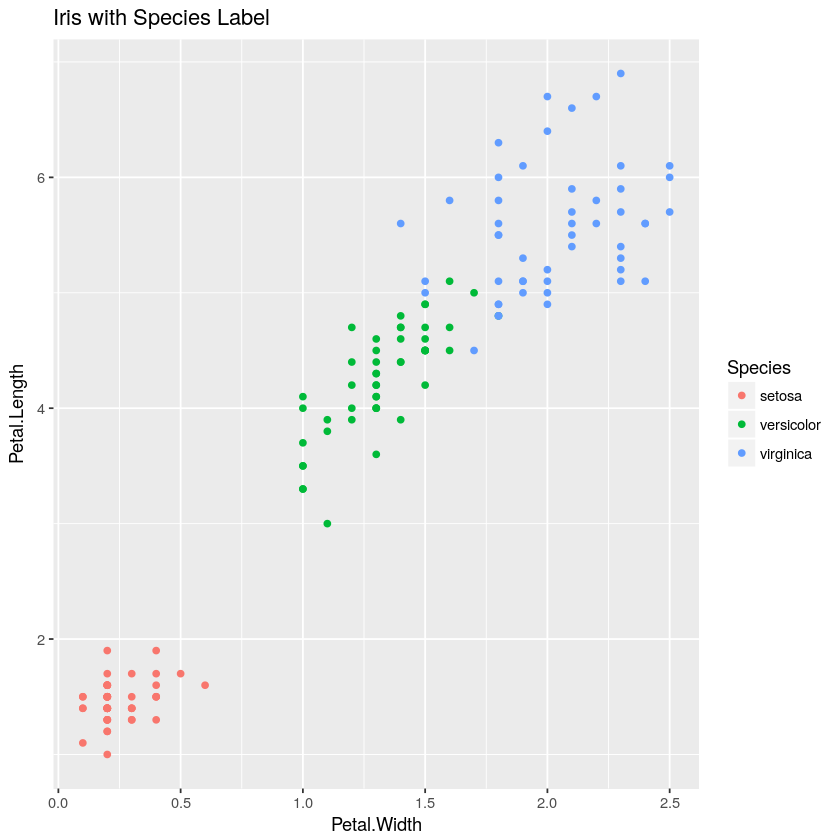

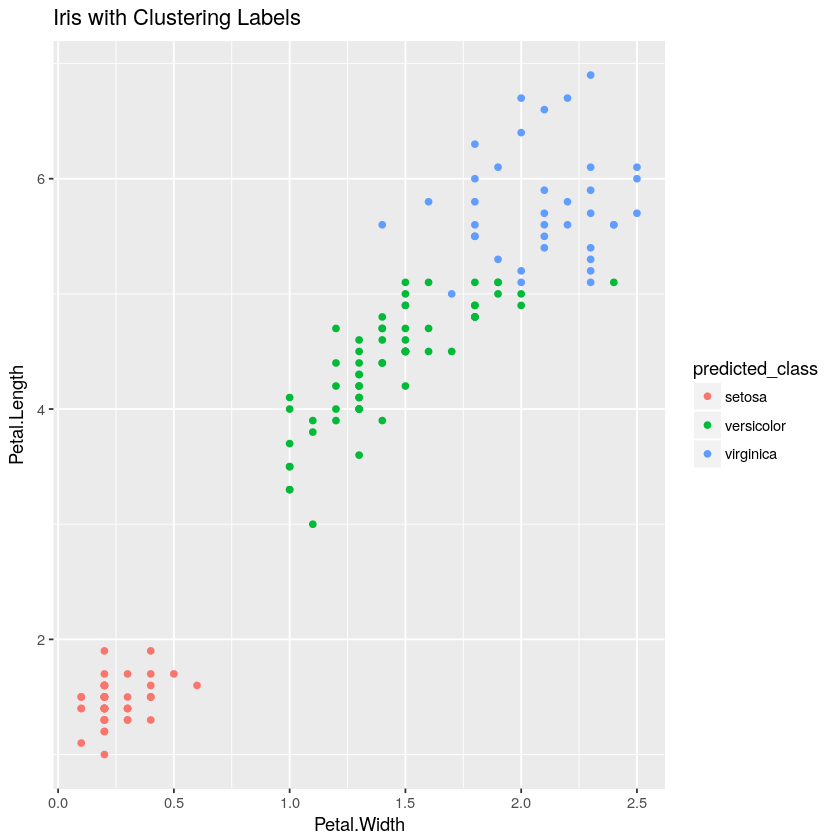

In [13]:
# El conjunto de datos iris tiene información de clase
# Veamos que también ha separado estas clases/clústeres
# el algoritmo kmeans

# Este es el gráfico para las etiquetas del conjunto de datos
library(ggplot2)
ggplot(iris, aes(x=Petal.Width, y=Petal.Length, col=Species)) + 
    geom_point() + labs(title="Iris with Species Label")

# Agregamos la información de la etiqueta dada por kmeans
prediction = my.clusters[[2]]$cluster
cluster_iris <- cbind(iris, prediction)

# Asignamos las etiquetas numéricas dadas por kmeans
cluster_iris$predicted_class <- ifelse(cluster_iris$prediction==1, "setosa", 
                            ifelse(cluster_iris$prediction==2,"versicolor","virginica"))

# Este es el resultado del algoritmo de clusterización
ggplot(cluster_iris, aes(x=Petal.Width, y=Petal.Length, col=predicted_class)) + 
    geom_point() + labs(title="Iris with Clustering Labels")

In [14]:
# Finalmente podemos evaluar la calidad del algoritmo de clustering
# Usando una matriz de confusión

library(caret)

confusionMatrix(cluster_iris$predicted_class, cluster_iris$Species)

Loading required package: lattice


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48        14
  virginica       0          2        36

Overall Statistics
                                          
               Accuracy : 0.8933          
                 95% CI : (0.8326, 0.9378)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.84            
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9600           0.7200
Specificity                 1.0000            0.8600           0.9800
Pos Pred Value              1.0000            0.7742           0.9474
Neg Pred Value              1.0000            0.9773           0.8750
Prevalence                  0.3333          